## Тема “Обучение без учителя”

#### ЗАДАНИЕ №1

##### Импортируйте библиотеки pandas, numpy и matplotlib

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [106]:
import matplotlib 
%matplotlib inline

## Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [107]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

#### Создайте датафреймы X и y из этих данных.

In [108]:
data = boston["data"]
data.shape

(506, 13)

In [109]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [110]:
target = boston["target"]
target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [111]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [113]:
y = pd.DataFrame(target, columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


#### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test). с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((404, 13), (102, 13), (404, 1), (102, 1))

#### Масштабируйте данные с помощью StandardScaler

In [115]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [116]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('Before:\t{}'.format(X_train_scaled.shape))
print('After TSNE:\t{}'.format(X_train_tsne.shape))


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Before:	(404, 13)
After TSNE:	(404, 2)


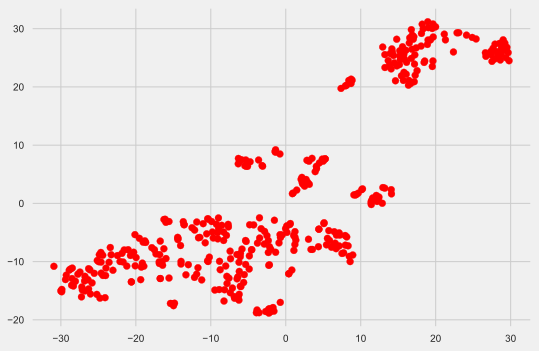

In [117]:
plt.style.use('seaborn-bright')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],c='red')
plt.show()


#### ЗАДАНИЕ №2

#### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера. Используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [118]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
kmeans.cluster_centers_

array([[-0.39886419,  1.55761113, -1.01661835, -0.09789972, -1.11157102,
         0.4694394 , -1.31625943,  1.43008074, -0.59047541, -0.58513831,
        -0.60269912,  0.35449756, -0.82802167],
       [ 0.81090356, -0.50032012,  1.12900228,  0.08796453,  1.14538259,
        -0.49660815,  0.77912417, -0.85778857,  1.2424768 ,  1.31237242,
         0.60373924, -0.65731177,  0.90021762],
       [-0.35959388, -0.36865917, -0.29295347, -0.014409  , -0.26109152,
         0.1188348 ,  0.07460493, -0.07354866, -0.56028098, -0.60915918,
        -0.1300668 ,  0.277444  , -0.22574751]])

In [119]:
colorsmap = []
for index, item in enumerate(labels_train):
    if item == 0: 
        colorsmap.append('red')
    if item == 1: 
        colorsmap.append('green')
    if item == 2: 
        colorsmap.append('blue')

#### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

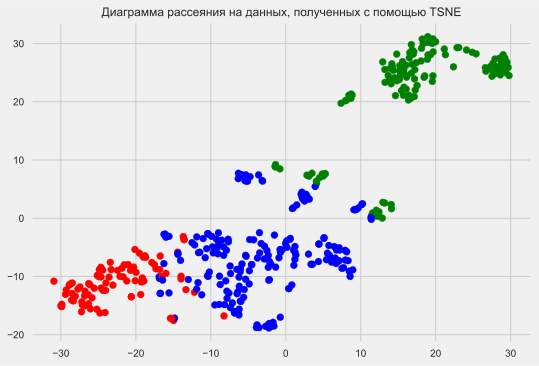

In [120]:

plt.style.use('seaborn-notebook')
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=colorsmap)
plt.title('Диаграмма рассеяния на данных, полученных с помощью TSNE')
plt.show()


#### Вычислите средние значения price и CRIM в разных кластерах.

In [121]:
#Вычислите средние значения price и CRIM в разных кластерах.
print('********** MEAN ************')
print('Cluster 0: {}'.format(y_train[labels_train == 0].mean()))
print('Cluster 1: {}'.format(y_train[labels_train == 1].mean()))
print('Cluster 2: {}'.format(y_train[labels_train == 2].mean()))
print('*********** CRIM **********')
print('Cluster 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Cluster 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Cluster 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))


********** MEAN ************
Cluster 0: price    27.788372
dtype: float64
Cluster 1: price    16.165354
dtype: float64
Cluster 2: price    24.958115
dtype: float64
*********** CRIM **********
Cluster 0: 0.07356558139534886
Cluster 1: 10.797028425196853
Cluster 2: 0.42166020942408367


#### Примените модель KMeans, построенную в предыдущем задании,  к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных

In [122]:
test_labels = kmeans.predict(X_test_scaled)

In [123]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [124]:
colorsmap = []
for index, item in enumerate(test_labels):
    if item == 0: 
        colorsmap.append('yellow')
    if item == 1: 
        colorsmap.append('magenta')
    if item == 2: 
        colorsmap.append('blue')

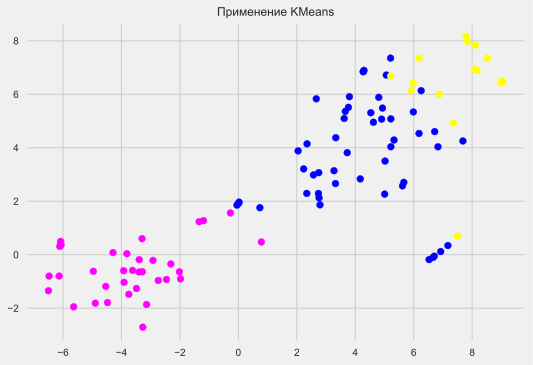

In [125]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=colorsmap)
plt.title('Применение KMeans')
plt.show()

In [126]:
#Вычислите средние значения price и CRIM в разных кластерах.
print('********** MEAN ************')
print('Cluster 0: {}'.format(y_test[test_labels == 0].mean()))
print('Cluster 1: {}'.format(y_test[test_labels == 1].mean()))
print('Cluster 2: {}'.format(y_test[test_labels == 2].mean()))
print('*********** CRIM **********')
print('Cluster 0: {}'.format(X_test.loc[test_labels == 0, 'CRIM'].mean()))
print('Cluster 1: {}'.format(X_test.loc[test_labels == 1, 'CRIM'].mean()))
print('Cluster 2: {}'.format(X_test.loc[test_labels == 2, 'CRIM'].mean()))

********** MEAN ************
Cluster 0: price    31.35
dtype: float64
Cluster 1: price    16.437143
dtype: float64
Cluster 2: price    21.860784
dtype: float64
*********** CRIM **********
Cluster 0: 0.062060000000000004
Cluster 1: 10.165531142857143
Cluster 2: 0.26607882352941176
